In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
from scipy import stats
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii

In [2]:
f=h5py.File("/Users/katel/Downloads/Research-Dr.Bovill/MW_blitz_z_cV160_151_e1.7_0.3_vF25_cooling19_coldmode_spnv_starvesatsF_ram01_tidal01_ode_vel300_sfr390.hdf5", 'r')

In [3]:
#Determine the distances of the stellarmasses and mask the satellites within the distance  
stellar_mass1=np.array(f['Outputs']['Output1']['nodeData']['massStellarTotal'])

mass_dm=f['Outputs']['Output1']['nodeData']['basicMass'][:]




l=np.argmax(mass_dm)
x=f['Outputs']['Output1']['nodeData']['positionPositionX'][:]-f['Outputs']['Output1']['nodeData']['positionPositionX'][:][l]
y=f['Outputs']['Output1']['nodeData']['positionPositionY'][:]-f['Outputs']['Output1']['nodeData']['positionPositionY'][:][l]
z=f['Outputs']['Output1']['nodeData']['positionPositionZ'][:]-f['Outputs']['Output1']['nodeData']['positionPositionZ'][:][l]
Lg=f['Outputs']['Output1']['nodeData']['spheroidLuminositiesStellar:SDSS_g:observed:z0.0000'][:]+f['Outputs']['Output1']['nodeData']['diskLuminositiesStellar:SDSS_g:observed:z0.0000'][:]
#Distance
d=np.sqrt(x**2.0+y**2.0+z**2.0)
Mg=-2.5*np.log10(Lg)
#Satellite mask
satellite_mask=(d<0.4)&(mass_dm<np.amax(mass_dm))
stellar_mass=stellar_mass1[satellite_mask]
order=np.argsort(stellar_mass)
ID=f['Outputs']['Output1']['nodeData']['satelliteNodeIndex'][:][satellite_mask][order]

<ipython-input-3-d16ae3d96635>:16: RuntimeWarning: divide by zero encountered in log10
  Mg=-2.5*np.log10(Lg)
<ipython-input-3-d16ae3d96635>:16: RuntimeWarning: invalid value encountered in log10
  Mg=-2.5*np.log10(Lg)


In [4]:
hlr=f['Outputs']['Output1']['nodeData']['halfLightRadiusSDSS_g:observed:z0.0000'][:][satellite_mask][order]


In [5]:
#The spheriod of SFH
sfh_sph=f['starFormationHistories']['Output1']['spheroidStarFormationHistory'][:][satellite_mask][order]
#The disk of SFH
sfh_disk=f['starFormationHistories']['Output1']['diskStarFormationHistory'][:][satellite_mask][order]
#time at which SFH occured to z=0
time=f['starFormationHistories']['Output1']['time'][:]

In [52]:
#Mask the Cummulative SFH
stellarmass_mask=(stellar_mass[order]>0)

sfh_tot = sfh_disk[stellarmass_mask]+sfh_sph[stellarmass_mask]

print(sfh_tot)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 ...

 [[0.00000000e+00 0.00000000e+00 2.49165001e+05 ... 1.59468733e+03
   1.41356931e+03 1.33375294e+03]]

 [[0.00000000e+00 3.46113901e+04 1.41467246e+06 ... 5.52909214e+02
   1.16408127e+03 1.45085736e+03]]

 [[0.00000000e+00 1.24806301e+06 9.68882084e+06 ... 4.91224441e+06
   1.17785286e+07 1.29178782e+07]]]


In [53]:
#The Cummulative SFH we want
sfh_cum = np.zeros((len(hlr[stellarmass_mask]),1,len(time)))
for sat in range(len(sfh_cum)):
    sfh_cum[sat]=np.cumsum((sfh_tot[sat]),axis=1)
print(np.shape(sfh_cum[10])) 

(1, 390)


In [54]:
#The number of halos
for i in range(0,68):
    print(time[i])

0.16
0.32
0.48000000000000004
0.64
0.8
0.9600000000000001
1.12
1.28
1.44
1.6
1.68
1.76
1.84
1.9200000000000002
2.0
2.0799999999999996
2.1599999999999997
2.2399999999999998
2.32
2.4
2.48
2.56
2.6399999999999997
2.7199999999999998
2.8
2.88
2.96
3.04
3.1199999999999997
3.1999999999999997
3.28
3.36
3.44
3.52
3.5999999999999996
3.6799999999999997
3.76
3.84
3.92
4.0
4.08
4.16
4.24
4.32
4.3999999999999995
4.4799999999999995
4.56
4.64
4.72
4.8
4.88
4.96
5.04
5.12
5.2
5.28
5.36
5.4399999999999995
5.52
5.6
5.68
5.76
5.84
5.92
6.0
6.08
6.16
6.24


In [55]:
#Normalization the cumulative SFH to a fraction of the final mass
t = len(time)

print(sfh_cum[10][0][t-1])

sfh_cum_norm = sfh_cum[20][0]/sfh_cum[20][0][t-1]  

10378.531475647247


<IPython.core.display.Javascript object>


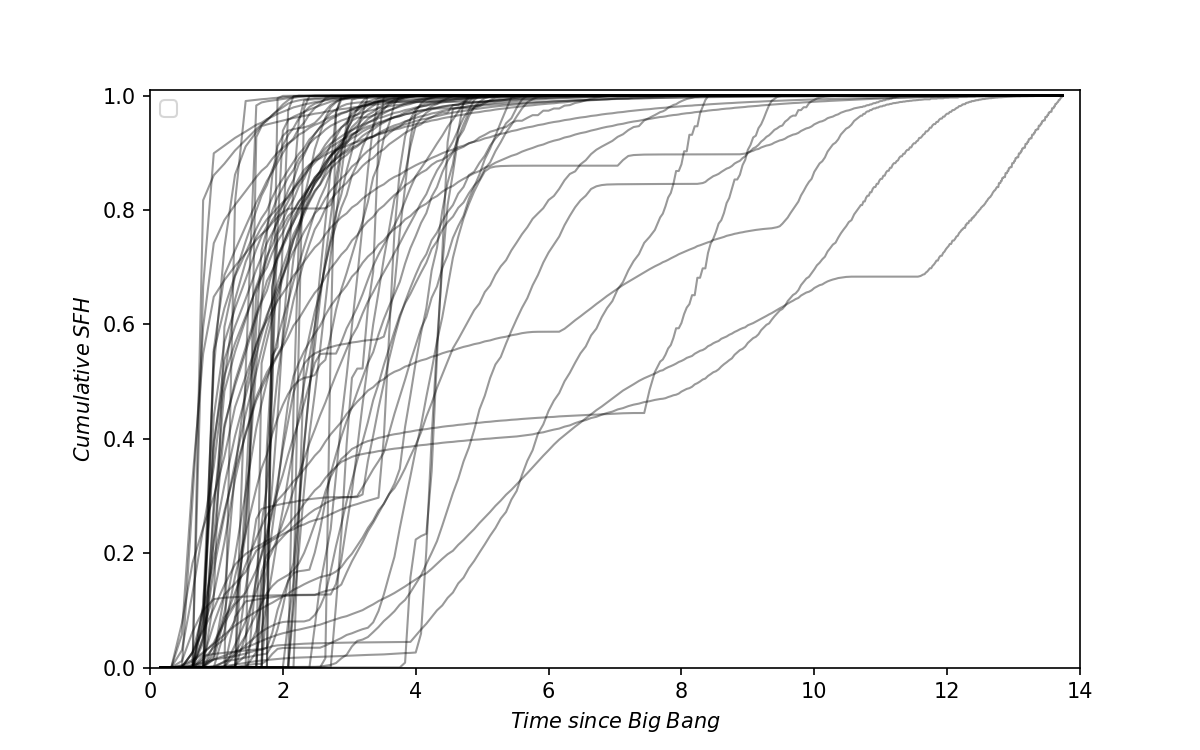

In [56]:
#Plot figure of Cummulative SFH
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot()


for i in range(len(sfh_cum)):
    sfh_cum_norm = sfh_cum[i][0]/sfh_cum[i][0][t-1]
    if(sfh_cum_norm[68]>0):
        ax.plot(time,sfh_cum_norm,c='black',linewidth=1, alpha=0.4, zorder=1)  
        
ax.set_ylim(0,1.01)
ax.set_xlim(0,14)


plt.ylabel('$Cumulative\;SFH$',fontsize=10)
plt.xlabel('$Time\;since\;Big\;Bang$', fontsize=10)
plt.show()